# <span style="color:darkblue"> Lecture 11: Application 1 - Linear Regression </span>

<font size = "5">

We will fit statistical models to data

- I will give an intro with minimal stats background
- See the optional lecture file for advanced users

The primary goal is to practice previous commands

# <span style="color:darkblue"> I. Import Libraries </span>


In [4]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<font size = "5">

Install the "statsmodels" library
- Run "pip3 install statsmodels" in the terminal
- Automatically included in Anaconda

In [5]:
# We will "alias" two sublibraries in "statsmodels"
# "statsmodels.formula.api" contains functions to estimate models
# "statsmodels.api" contains general-use statistical options

import statsmodels.api as sm
import statsmodels.formula.api as smf


# <span style="color:darkblue"> II. Generate simulated Data </span>

<font size = "5">

Create an empty dataset

In [6]:
dataset = pd.DataFrame([])

<font size = "5">

Create two random variables of size ($n = 50$)

In [7]:
n = 50
dataset["x"] = np.random.normal(loc = 0,scale = 1, size = n)
dataset["e"] = np.random.normal(loc = 0,scale = 1, size = n)


<font size = "5">

Create data from the linear model

$ y = b_0 + b_1 x + e, \qquad b_0 = 1, b_1 = 2.$

In [8]:
# The number b0 is known as the "intercept"
# The number b1 is known as the "slope"

b0 = 1
b1 = 2

# We can compute formulas directly over dataset columns
dataset["y"] = b0 + b1 * dataset["x"] + dataset["e"]

<font size = "5">

Compute the theoretically best fit line

$ p = b_0 + b_1 x$

In [10]:
dataset["p"] = b0 + b1*dataset["x"]

<font size = "5">

Plot the data

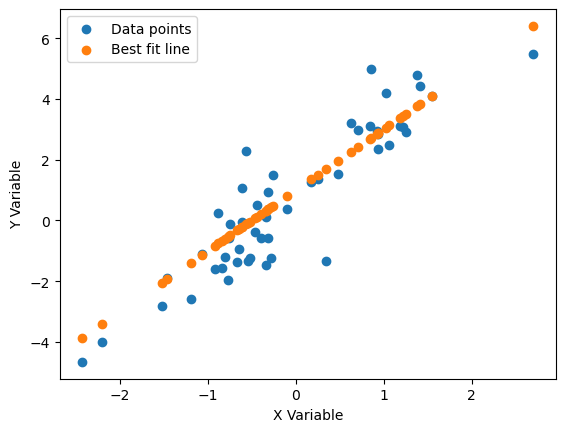

In [12]:
plt.scatter(x = dataset["x"], y = dataset["y"])
plt.scatter(x = dataset["x"], y = dataset["p"])

plt.xlabel("X Variable")
plt.ylabel("Y Variable")
plt.legend(labels = ["Data points", "Best fit line"])
plt.show()


<font size = "5" >

Try it yourself

- Create a new dataset called $\quad$```subset_above2``` 
- This subsets records with $y \ge 2$ using $\quad$```.query()```
- Count the original rows $\quad$ ```len(dataset)```
- Count the subsetted rows $\quad$ ```len(subset_above2)```
- Compute the proportion of subsetted observations


In [17]:
# Write your own code here

subset_above2 = dataset.query("y >= 2")
num_original_observations = len(dataset)
num_subsetted_observations= len(subset_above2)

prop_subsetted_observations = num_subsetted_observations/ num_original_observations
print(prop_subsetted_observations)

0.34


<font size = "5">

Try it yourself!

- Store the sample mean of $y$ as $\quad$ ```ybar```
- Compute the standard deviation of $y$ $\quad$ ```stdv_sample```
- Use ```.query()``` to subset observations that satisfy

$ \qquad abs\left(y - ybar \right) \le stdv\_sample $

$\quad$ HINT: Use ```.mean()```,$\text{ }$ ```.std()``` <br>
$\quad$ HINT: Use the globals  $\ $ ```@xbar```,$\text{ }$ ```@stdv_sample```

In [27]:
# Note: abs(...) is the absolute value function
# Write your own code 

ybar = dataset["y"].mean()
print(ybar)
stdv_sample = ybar = dataset["y"].std()

print(stdv_sample)

dataset.query("abs(y - @ybar) <= @stdv_sample")



0.6730228616827442
2.4327766945878073


,x,e,y,p
1,1.064164,-0.653503,2.474825,3.128328
2,0.179554,-0.090023,1.269085,1.359108
3,0.935439,-0.035961,2.834916,2.870877
12,1.379500,1.015144,4.774144,3.759000
15,-0.258713,1.030352,1.512926,0.482574
16,1.216809,-0.341298,3.092320,3.433619
17,0.703794,0.577316,2.984903,2.407587
18,0.480959,-0.445289,1.516628,1.961917
20,1.189683,-0.266904,3.112461,3.379365
23,0.252992,-0.136748,1.369236,1.505984


# <span style="color:darkblue"> II. Estimate the best fit line</span>


<font size = "5">

We have data on $(y,x)$ but we don't know $(b_0,b_1)$

<font size = "5">

Let's fit an OLS model

- It's a statistical approach to get $(b_0,b_1)$
- No need to know how it works but why we want it

In [32]:
#------------------------------------------------------------------------------#
# We use the subfunction "ols()" in the library "smf"
#---- (i) The first argument is a string called "formula" with the format 
#-------- "outcome ~ indepdent_vars"
#----(ii) the second argument is the dataset
# The second line fits the model with standard errors "cov". In this case we 
# use "robust" standard errors (HC1)
#-------------------------------------------------------------------------------#

model   = smf.ols(formula = 'y ~  x',data = dataset)
y_pred = model.fit(cov = "HC1") # cov is the standard error in this example. 

# Can also run as one line
# results = smf.ols(formula = 'y ~ x',data = dataset).fit(cov = "HC1")


<font size = "5">

Compute the estimated best fit line

In [33]:
# We will use ".params" to get the attribute "parameters from the results"

b_list = y_pred.params # get intercept and slope 
print(b_list)

# We can then compute the "estimated" best fit lines
# by extracting the intercept and slop from "b_list"

dataset["p_estimated"] = b_list[0] + b_list[1]  * dataset["x"]

# Note: The estimators for "b0" and "b1" are close to 
# the values we used to generate the data


Intercept    0.808827
x            2.173573
dtype: float64


<font size = "5">

Plot the best fit line

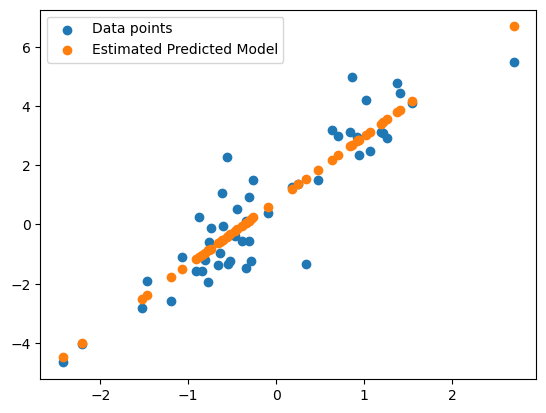

In [34]:
# Use scatter twice, with different "y" inputs
# THe "legend" command creates a box on with the color labels

plt.scatter(x = dataset["x"],y = dataset["y"])
plt.scatter(x = dataset["x"],y = dataset["p_estimated"])

plt.legend(labels = ["Data points","Estimated Predicted Model"])
plt.show()


<font size = "5">

Try it yourself!
- How good is the estimated fit?
- Create two overlapping scatterplots
- $(p \text{ }$ vs $\text{ } x)$ and $(p_{estimated} \text{ }$ vs $\text{ } x)$
- Create a legend to label each plot

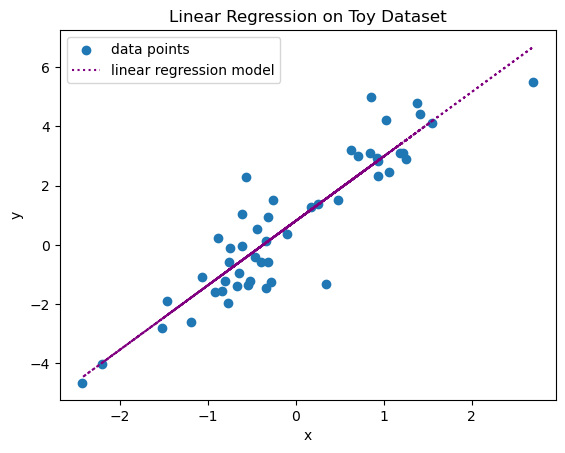

In [57]:
# Write your own code
plt.scatter(x = dataset["x"], y = dataset["y"])
plt.plot(dataset["x"], dataset["p_estimated"], linestyle = 'dotted', color = "purple")
plt.legend(["data points", "linear regression model"])
plt.xlabel("x")
plt.ylabel("y")

plt.title("Linear Regression on Toy Dataset")
plt.show()

<font size = "5">

Try it youself

- Compute a column with the formula

$\quad$ ``` sample_error = y - p_estimated```

- Create a lambda function <br>

$\quad$ ``` fn_positive_error  error: error >= 0  ```

- Compute a column for whether the error is positive <br>
using ``` .apply()```



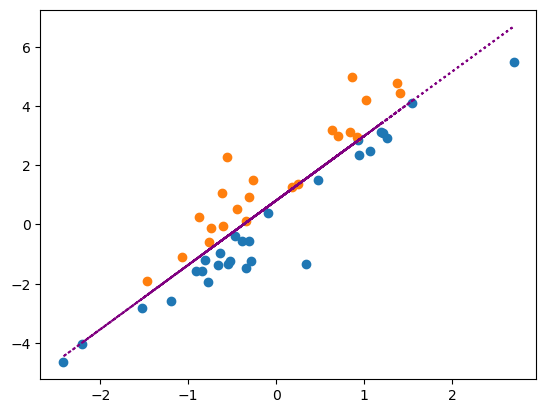

In [58]:
# Write your own code

dataset["sample_error"] = dataset["y"] - dataset["p_estimated"]

fn_positive_error = lambda error: error >= 0


dataset["positive_sample_error"] = dataset["sample_error"].apply(fn_positive_error)

dataset

plt.scatter(dataset.query("positive_sample_error != True")["x"], dataset.query("positive_sample_error != True")["y"])
plt.scatter(dataset.query("positive_sample_error == True")["x"], dataset.query("positive_sample_error == True")["y"])
plt.plot(dataset["x"], dataset["p_estimated"], linestyle = 'dotted', color = "purple")

plt.show()

<font size = "5">

Try it yourself

- Compute a new column <br>

```error_sqr = sample_error ** 2```

- Calculate the mean of ```error_sqr```

In [60]:
# Write your own code

dataset["error_sqr"] = dataset["sample_error"]**2


MSE = dataset["error_sqr"].mean()

print(MSE)


0.9254037755423232
